<a href="https://colab.research.google.com/github/AXBOUF/python_visulization/blob/main/nyctaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! neofetch

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
root@487890501ed6 
----------------- 
OS: Ubuntu 22.04.4 LTS x86_64 
Host: Google Compute Engine 
Kernel: 6.6.105+ 
Uptime: 16 mins 
Packages: 1353 (dpkg) 
Shell: bash 5.1.16 
Terminal: jupyter-server 
CPU: Intel Xeon (2) @ 2.200GHz 
Memory: 1079MiB / 

EXPLORATORY ANALYSIS OF NYC_TAXI_TRIP_DURATION DATA SET
Must have deliverable of the data
Clustering timestamp of data cateogorizing in terms of dates or location or location that shares the most pickup and drop of clusters


In [60]:
# import all the necessary modules and compile them all in this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
# lets stick to normal exploration for simplicity


In [5]:
# lets import the source data set from local device refer to keyword search "nyc_taxi_trip_dataset" if want to find it ever
df_original = pd.read_csv('nyc_taxi.csv')

In [9]:
# lets reason the varaibles and what they are
# id trip id more likely they are identifier for the refrenced trip_duration
# vendor_id
# pickup_datetime self explanatory
# droff_datetime
# passenger_count
# Latitude measures a location's north-south position from the equator, while longitude measures its east-west position from the prime meridian.
# pickup_longitude
# pickup_latitude
# dropoff_longitude and dropoff_latitude
# store_and_fwd_flag
# trip_duration probably in seconds


In [8]:
df_original.shape

(729322, 11)

In [6]:
df_original.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [26]:
df_original.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.0000,729322.0000,729322.0000,729322.0000,729322.0000,729322.0000,729322.0000
mean,1.5354,1.6621,-73.9735,40.7509,-73.9734,40.7518,952.2291
std,0.4987,1.3124,0.0698,0.0336,0.0696,0.0360,3864.6262
min,1.0000,0.0000,-121.9333,34.7122,-121.9333,32.1811,1.0000
25%,1.0000,1.0000,-73.9919,40.7373,-73.9913,40.7359,397.0000
50%,2.0000,1.0000,-73.9818,40.7541,-73.9798,40.7545,663.0000
75%,2.0000,2.0000,-73.9674,40.7683,-73.9630,40.7697,1075.0000
max,2.0000,9.0000,-65.8974,51.8811,-65.8974,43.9210,1939736.0000


In [15]:
pd.options.display.float_format = '{:.4f}'.format
df_original.trip_duration.describe()

,trip_duration
count,729322.0000
mean,952.2291
std,3864.6262
min,1.0000
25%,397.0000
50%,663.0000
75%,1075.0000
max,1939736.0000


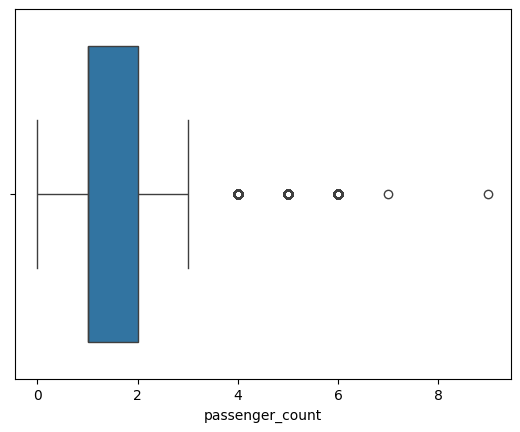

In [19]:
# boxplot of passenger_count
sns.boxplot(x=df_original['passenger_count'])
plt.show()

In [20]:
df_original.passenger_count.value_counts() # note we will remove the 0 , 7 , 9 or replace it with mean

,count
passenger_count,
1,517415
2,105097
5,38926
3,29692
6,24107
4,14050
0,33
7,1
9,1


In [27]:
df_original['trip_duration'] = df_original['trip_duration'].astype(float)

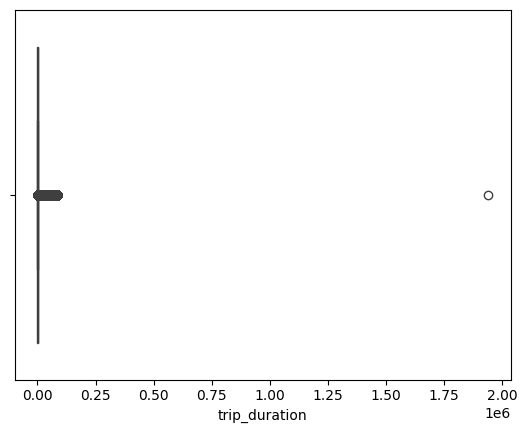

In [28]:
# boxplot for duration
sns.boxplot(x=df_original['trip_duration'])
plt.show()

In [54]:
# Get value counts for 'trip_duration'
trip_duration_counts = df_original['trip_duration'].value_counts()

# Filter for trip durations less than 60 seconds
short_trip_duration_counts = trip_duration_counts[trip_duration_counts.index < 60]
num_trip_durations_less_than_60 =trip_duration_counts[trip_duration_counts.index < 60].sum()
# Display the results
# display(short_trip_duration_counts)
display(num_trip_durations_less_than_60) # 0.5856% of trips are under a min and 1 trip is literally in a sec

np.int64(4271)

In [55]:
# certain row query
row_with_1_sec_trip = df_original['trip_duration'] == 1
df_original[row_with_1_sec_trip]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
70318,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.9460,40.7922,-73.9474,40.7927,N,1.0000
95823,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.9757,40.7855,-73.9764,40.7858,N,1.0000
102646,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.9404,40.7864,-73.9403,40.7864,N,1.0000
119181,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.8620,40.7686,-73.8620,40.7686,N,1.0000
296874,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.8199,40.7408,-73.8199,40.7408,N,1.0000
312992,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.9807,40.7444,-73.9807,40.7444,N,1.0000
323299,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.9806,40.7548,-73.9806,40.7548,N,1.0000
398887,id2402793,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.7897,40.6470,-73.7897,40.6470,N,1.0000
512833,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.9832,40.7672,-73.9832,40.7671,N,1.0000
533760,id0948644,2,2016-02-22 00:40:25,2016-02-22 00:40:26,0,-73.9876,40.7200,-73.9876,40.7200,N,1.0000


In [56]:
df_original.trip_duration.value_counts()[1]

np.int64(13)

In [57]:
# above given dataset could be a false showcase for showing peak zones
# it seems we can transform values to timestamp objects
df_original['ptimestamp'] = pd.to_datetime(df_original['pickup_datetime'])
df_original.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,ptimestamp
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.9539,40.7789,-73.9639,40.7712,N,400.0000,2016-02-29 16:40:21
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.9883,40.7317,-73.9948,40.6949,N,1100.0000,2016-03-11 23:35:37
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.9973,40.7215,-73.9480,40.7749,N,1635.0000,2016-02-21 17:59:33
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.9617,40.7597,-73.9568,40.7806,N,1141.0000,2016-01-05 09:44:31
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.0171,40.7085,-73.9882,40.7406,N,848.0000,2016-02-17 06:42:23
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.9936,40.7519,-73.9954,40.7239,N,1455.0000,2016-02-14 18:31:42
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.9651,40.7589,-73.9768,40.7641,N,397.0000,2016-04-20 20:30:14
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.9639,40.7654,-73.8724,40.7742,N,1101.0000,2016-06-19 16:48:14
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.8729,40.7743,-73.9790,40.7619,N,1886.0000,2016-03-28 19:17:03
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.9878,40.7410,-73.9992,40.6865,N,1429.0000,2016-04-10 22:01:41


In [61]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  object        
 3   dropoff_datetime    729322 non-null  object        
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  float64       
 11  ptimestamp          729322 non-null  datetime64[ns]
 12  dtimestamp          729322 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64

In [59]:
df_original['dtimestamp'] = pd.to_datetime(df_original['dropoff_datetime'])
df_original.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,ptimestamp,dtimestamp
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.9539,40.7789,-73.9639,40.7712,N,400.0000,2016-02-29 16:40:21,2016-02-29 16:47:01
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.9883,40.7317,-73.9948,40.6949,N,1100.0000,2016-03-11 23:35:37,2016-03-11 23:53:57
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.9973,40.7215,-73.9480,40.7749,N,1635.0000,2016-02-21 17:59:33,2016-02-21 18:26:48
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.9617,40.7597,-73.9568,40.7806,N,1141.0000,2016-01-05 09:44:31,2016-01-05 10:03:32
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.0171,40.7085,-73.9882,40.7406,N,848.0000,2016-02-17 06:42:23,2016-02-17 06:56:31
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.9936,40.7519,-73.9954,40.7239,N,1455.0000,2016-02-14 18:31:42,2016-02-14 18:55:57
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.9651,40.7589,-73.9768,40.7641,N,397.0000,2016-04-20 20:30:14,2016-04-20 20:36:51
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.9639,40.7654,-73.8724,40.7742,N,1101.0000,2016-06-19 16:48:14,2016-06-19 17:06:35
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.8729,40.7743,-73.9790,40.7619,N,1886.0000,2016-03-28 19:17:03,2016-03-28 19:48:29
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.9878,40.7410,-73.9992,40.6865,N,1429.0000,2016-04-10 22:01:41,2016-04-10 22:25:30


In [67]:
# lets try sth
df_original['pmonth'] = df_original['ptimestamp'].dt.month
df_original['pday'] = df_original['ptimestamp'].dt.day
df_original['phour'] = df_original['ptimestamp'].dt.hour
df_original['pminute'] = df_original['ptimestamp'].dt.minute
# df_original['pweekdays'] = df_original['ptimestamp'].dt.weekday #This attribute was deprecated and eventually removed.
df_original['pweekdays'] = df_original['ptimestamp'].dt.day_name()

In [69]:
# lets try sth
df_original['dmonth'] = df_original['dtimestamp'].dt.month
df_original['dday'] = df_original['dtimestamp'].dt.day
df_original['dhour'] = df_original['dtimestamp'].dt.hour
df_original['dminute'] = df_original['dtimestamp'].dt.minute
# df_original['dweekdays'] = df_original['dtimestamp'].dt.weekday #This attribute was deprecated and eventually removed.
df_original['dweekdays'] = df_original['dtimestamp'].dt.day_name()

In [70]:
df_original.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pmonth,pday,phour,pminute,pweekdays,dmonth,dday,dhour,dminute,dweekdays
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.9539,40.7789,-73.9639,40.7712,N,...,2,29,16,40,Monday,2,29,16,47,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.9883,40.7317,-73.9948,40.6949,N,...,3,11,23,35,Friday,3,11,23,53,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.9973,40.7215,-73.9480,40.7749,N,...,2,21,17,59,Sunday,2,21,18,26,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.9617,40.7597,-73.9568,40.7806,N,...,1,5,9,44,Tuesday,1,5,10,3,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.0171,40.7085,-73.9882,40.7406,N,...,2,17,6,42,Wednesday,2,17,6,56,Wednesday
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.9936,40.7519,-73.9954,40.7239,N,...,2,14,18,31,Sunday,2,14,18,55,Sunday
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.9651,40.7589,-73.9768,40.7641,N,...,4,20,20,30,Wednesday,4,20,20,36,Wednesday
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.9639,40.7654,-73.8724,40.7742,N,...,6,19,16,48,Sunday,6,19,17,6,Sunday
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.8729,40.7743,-73.9790,40.7619,N,...,3,28,19,17,Monday,3,28,19,48,Monday
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.9878,40.7410,-73.9992,40.6865,N,...,4,10,22,1,Sunday,4,10,22,25,Sunday


In [ ]:
# lets see if there are any over days trips example monday to tuesday
